Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
# Your Work Here

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))
import matplotlib.font_manager


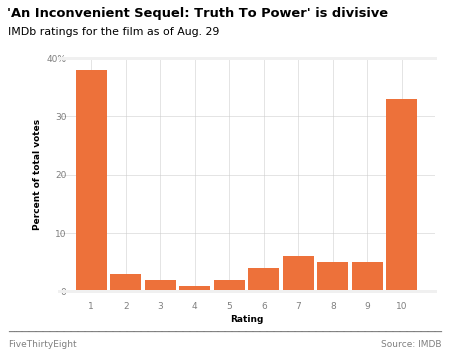

In [132]:
#set style sheet for graphs
plt.style.use('fivethirtyeight')

#create figure and axes variables
fig, ax = plt.subplots()


#plot, color and shape bar
ax.bar(x=range(1,11,1), height=fake, color='#ed713a', width=0.9)

#set figure background
fig.set_facecolor(color='None')

#set axes background
ax.set_facecolor(color='None')

#set x label
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

#set y label
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

#set x ticks
ax.set_xticks(range(1,11,1))

#set y ticks
ax.set_yticks(range(0,50,10))

#set x tick labels
ax.set_xticklabels(range(1,11,1), alpha=.5, fontsize=9, y=-.03)

#set y tick labels
ax.set_yticklabels([0,10,20,30,'40%'], alpha=.5, fontsize=9, x=0.03)

#remove right spine
ax.spines['right'].set_visible(False)

#remove left spine
ax.spines['left'].set_visible(False)

#Title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=13, x=.37, y=1.15, fontweight='bold')

#subtitle
ax.text(s="IMDb ratings for the film as of Aug. 29", x=-1.4, y=44, fontsize=11)


#decrease boldens of gridlines
ax.tick_params(grid_alpha=.5)

#add footer
ax.text(s='______________________________________________________________', x=-1.4, y=-6.5, alpha=.5)
ax.text(s='FiveThirtyEight', x=-1.4, y=-9.5, fontsize=9, alpha=.5)
ax.text(s='Source: IMDB', x=9.4, y=-9.5, fontsize=9, alpha=.5)
plt.show()

In [12]:
display(example)

In [209]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png?w=57'
example = Image(url=url, width=300)

display(example)

fake1 = pd.Series([3,3.7,2.8,3.2, 3, 4, 3.5,3.4, 2,2.5,2.8,2.9,3,5,2.5])
fake2 = pd.Series([1,1.7,1.8,2.2, 2, 3, 2.5,2.4, 1,1.5,1.8,1.9,2,4,1.2])


In [0]:
###https://fivethirtyeight.com/features/the-media-frenzy-around-biden-is-fading/

###Read in cable_weekly dataset

cable_weekly = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv')
print(cable_weekly.dtypes)
cable_weekly.head()



In [0]:
cable_weekly['name'].value_counts()

In [0]:
###Read in online_weekly dataset

# online_weekly = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv')
# print(online_weekly.dtypes)
# online_weekly.head()


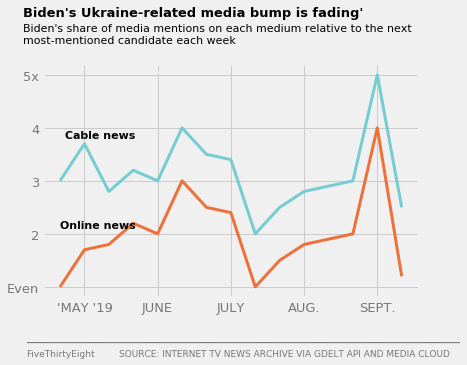

In [261]:
#set style for plot
plt.style.use('fivethirtyeight')

#set up figure and axes subplot
fig1, ax1 = plt.subplots()

#plot grapghs
ax1.plot(fake1, linewidth=3, color='#75cdd2')
ax1.plot(fake2, linewidth=3, color='#ed713a')

#set x ticks
ax1.set_xticks(range(1,16,3))

#set y ticks
ax1.set_yticks(range(1,6,1))


#set x tick label
ax1.set_xticklabels(["'MAY '19", 'JUNE', 'JULY', 'AUG.', 'SEPT.', 'OCT.'], fontsize=13, alpha=.5)

#set y tick label
ax1.set_yticklabels(['Even', 2, 3, 4, '5x'], fontsize=13, alpha=.5)

#text to label each plot
ax1.text(x=.2, y=3.8, s='Cable news', fontweight='bold', fontsize=11)

#text to label each plot
ax1.text(x=0, y=2.1, s='Online news', fontweight='bold', fontsize=11)

#text to title
ax1.text(x=-1.5, y=6.1, s="Biden's Ukraine-related media bump is fading'", fontweight='bold', fontsize=13)
#text to subtitle
ax1.text(x=-1.5, y=5.6, s="Biden's share of media mentions on each medium relative to the next \nmost-mentioned candidate each week", fontsize=11)

ax1.arrow(x=4, y=5 ,dx=1, dy=1)


#add footer
ax1.text(s='______________________________________________________________', x=-1.4, y=0, alpha=.5)
ax1.text(s='FiveThirtyEight', x=-1.4, y=-0.3, fontsize=9, alpha=.5)
ax1.text(s='SOURCE: INTERNET TV NEWS ARCHIVE VIA GDELT API AND MEDIA CLOUD', x=2.4, y=-0.3, fontsize=9, alpha=.5)





plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [263]:
# More Work Here

#read in dataset

candy_power_rankings = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv')
candy_power_rankings.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


KeyError: ignored

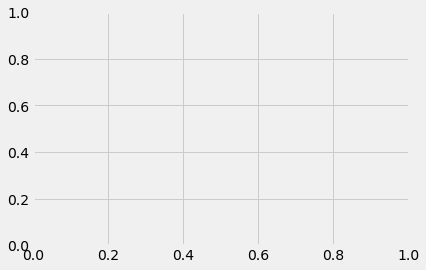

In [272]:
#set figure and axes variables

fig2, ax2 = plt.subplots()

ax2.bar(candy_power_rankings['winpercent', 'competitorname'], y=1, width=.9, )

